## Explore data

To train a regression model, you need a dataset that includes historical features, characteristics of the entity for which you want to make a prediction. [Bir regresyon modelini eğitmek için, geçmiş özelliklerini, kendisi hakkında tahminde bulunmak istediğiniz varlığın özelliklerini içeren bir veri kümesine ihtiyacınız vardır.] You also need known label values, the numeric value that you want to train a model to predict. [Ayrıca, bir modeli tahmin etmesi için eğitmek istediğiniz sayısal değer olan bilinen etiket değerlerine de ihtiyacınız vardır.]

### Create a dataset

In Azure Machine Learning, data for model training and other operations is usually encapsulated in an object called a dataset. [Azure Machine Learning'de, model eğitimi ve diğer işlemler için veriler genellikle veri kümesi adı verilen bir nesnede kapsüllenir.]

1. In Azure Machine Learning studio, view the Datasets page. [Azure Machine Learning stüdyosunda Veri Kümeleri sayfasını görüntüleyin.] Datasets represent specific data files or tables that you plan to work with in Azure ML. [Veri kümeleri, Azure ML'de birlikte çalışmayı planladığınız belirli veri dosyalarını veya tabloları temsil eder.]

2. Create a new dataset from web files, using the following settings: [Aşağıdaki ayarları kullanarak web dosyalarından yeni bir veri kümesi oluşturun:]
    - **Basic Info**: [Temel bilgi:]

        - **Web URL**: https://aka.ms/diabetes-data

        - **Name**: diabetes-data

        - **Dataset type**: Tabular [Veri kümesi türü: Tablo]

        - **Description**: Diabetes data
        
        - **Skip data validation**: Do not select

    - **Settings and preview**: [Ayarlar ve önizleme:]

        - **File format**: Delimited [Dosya biçimi: Sınırlandırılmış]

        - **Delimiter**: Comma [Ayırıcı: Virgül]

        - **Encoding**: UTF-8 [Kodlama: UTF-8]

        - **Column headers**: Only first file has headers [Sütun başlıkları: Yalnızca ilk dosyanın başlıkları var]

        - **Skip rows**: None [Satır atla: Yok]

    - **Schema**: [Şema:]

        - Include all columns other than **Path** [Yol dışındaki tüm sütunları dahil et]

        - Review the automatically detected types [Otomatik olarak algılanan türleri gözden geçirin]

    - **Confirm details**: [Ayrıntıları onaylayın:]

        - Do not profile the dataset after creation [Oluşturulduktan sonra veri kümesinin profilini çıkarmayın]

3. After the dataset has been created, open it and view the **Explore** page to see a sample of the data. [Veri kümesi oluşturulduktan sonra açın ve verilerin bir örneğini görmek için Keşfet sayfasını görüntüleyin.] This data represents details from patients who have been tested for diabetes.

**Citation**: This data is derived from Capital Bikeshare (https://ride.capitalbikeshare.com/system-data) and is used in accordance with the published data license agreement (https://ride.capitalbikeshare.com/data-license-agreement). [Alıntı: Bu veriler Capital Bikeshare'den türetilmiştir ve yayınlanan veri lisans sözleşmesine uygun olarak kullanılır.]



### Create a pipeline

To get started with Azure Machine Learning designer, first you must create a pipeline and add the dataset you want to work with.

1. In Azure Machine Learning studio, view the **Designer** page (under **Author**), and select + to create a new pipeline. [Azure Machine Learning stüdyosunda Tasarımcı sayfasını görüntüleyin (Yazar altında) ve yeni bir işlem hattı oluşturmak için + öğesini seçin.]

2. At the top left-hand side of the screen, click on the default pipeline name (**Pipeline-Created-on-date**) and change it to **Diabetes Training**. 

3. You need to specify a compute target on which to run the pipeline. In the **Settings** pane, click on **Select compute target** to select the compute cluster you created previously (if the **Settings** pane is not visible, select the **⚙** icon next to the pipeline name at the top). [Ayarlar bölmesinde, daha önce oluşturduğunuz işlem kümesini seçmek için İşlem hedefini seç'e tıklayın (Ayarlar bölmesi görünmüyorsa, üst taraftaki işlem hattı adının yanındaki ⚙ simgesini seçin).]

4. Next to the pipeline name on the left, select the button >> to expand the panel. Drag the **diabetes-data** dataset you created in the previous exercise onto the canvas.

5. Right-click (Ctrl+click on a Mac) the **diabetes-data** dataset on the canvas, and on the **Outputs** menu, select **Dataset output** by clicking on the Preview data graph icon.

6. Review the schema of the data, noting that you can see the distributions of the various columns as histograms.

7. Scroll to the right and select the column heading for the **Diabetic** column, and note that it contains two values **0** and **1**. These values represent the two possible classes for the label that your model will predict, with a value of **0** meaning that the patient does not have diabetes, and a value of **1** meaning that the patient is diabetic.

8. Scroll back to the left and review the other columns, which represent the features that will be used to predict the label. Note that most of these columns are numeric, but each feature is on its own scale. For example, **Age** values range from 21 to 77, while **DiabetesPedigree** values range from 0.078 to 2.3016. When training a machine learning model, it is sometimes possible for larger values to dominate the resulting predictive function, reducing the influence of features that on a smaller scale. Typically, data scientists mitigate this possible bias by normalizing the numeric columns so they're on the similar scales.

9. Close the **diabetes-data result visualization** window so that you can see the dataset on the canvas like this:

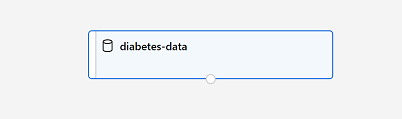

### Add data transformations

Before you can train a model, you typically need to apply some preprocessing transformations to the data.

1. In the pane on the left, expand the **Data Transformation** section, which contains a wide range of modules you can use to transform data before model training. [Soldaki bölmede, model eğitiminden önce verileri dönüştürmek için kullanabileceğiniz çok çeşitli modüller içeren Veri Dönüşümü bölümünü genişletin.]

2. Drag a **Normalize Data** module to the canvas, below the **diabetes-data** module. Then connect the output at the bottom of the **Automobile price data (Raw)** module to the input at the top of the **diabetes-data** module, like this: 

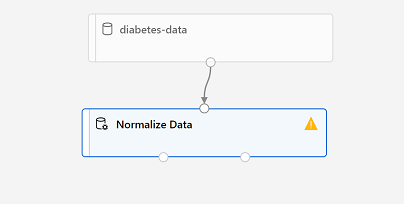

3. Select the **Normalize Data** module and view its settings, noting that it requires you to specify the transformation method and the columns to be transformed.

4. Set the transformation to MinMax and edit the columns to include the following columns by name, as shown in the image:

    - Pregnancies

    - PlasmaGlucose

    - DiastolicBloodPressure

    - TricepsThickness

    - SerumInsulin

    - BMI

    - DiabetesPedigree

    - Age
    
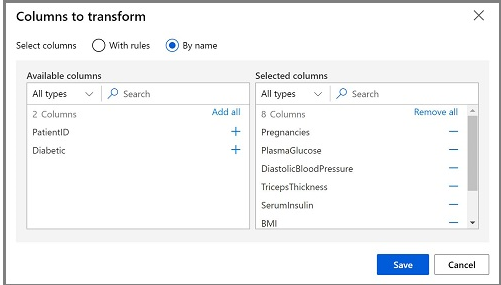

The data transformation is normalizing the numeric columns to put them on the same scale, which should help prevent columns with large values from dominating model training. [Veri dönüştürme, sayısal sütunları aynı ölçeğe yerleştirmek için normalleştirir; bu, büyük değerlere sahip sütunların model eğitimine hakim olmasını önlemeye yardımcı olmalıdır.] You'd usually apply a whole bunch of pre-processing transformations like this to prepare your data for training, but we'll keep things simple in this exercise. [Verilerinizi eğitime hazırlamak için genellikle bunun gibi bir sürü ön işleme dönüşümü uygularsınız, ancak bu alıştırmada işleri basit tutacağız.]

### Run the pipeline

To apply your data transformations, you must run the pipeline as an experiment.

1. Ensure that your pipeline looks similar to this image:

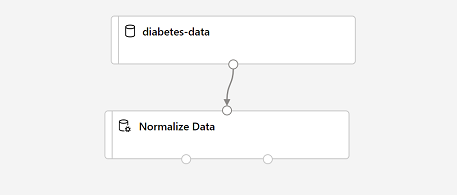

2. Select **Submit**, and run the pipeline as a new experiment named **mslearn-diabetes-trainingg** on your compute cluster.

3. Wait for the run to finish - this may take a few minutes.

### View the transformed data

The dataset is now prepared for model training.

1. Select the completed **Normalize Data** module, and in its **Settings** pane on the right, on the **Outputs + logs** tab, select the Preview data icon for the Transformed dataset.

2. View the data, noting that the numeric columns you selected have been normalized to a common scale.

3. Close the normalized data result visualization.